In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

# Round 1

In [3]:
churnData = pd.read_csv('DATA_Customer-Churn.txt', sep=",", na_values=" ")

In [5]:
churnData.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.50,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [6]:
churnData.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [5]:
pd.to_numeric(churnData['TotalCharges'])

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7043, dtype: float64

In [8]:
churnData.isna().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [6]:
churnData.fillna({'TotalCharges': 0}, inplace=True)

In [10]:
churnData.isna().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [7]:
y=churnData['Churn']
X=churnData[['tenure','SeniorCitizen', 'MonthlyCharges','TotalCharges']]

In [8]:
def split_data(X, y, test_size=0.2, random_state=42):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)  
    return X_train, X_test, y_train, y_test

In [9]:
X_train, X_test, y_train, y_test = split_data(X, y)

In [10]:
#change yes and no to 0 and 1
y_train = y_train.map({'Yes': 1, 'No': 0}).astype(int)
y_test = y_test.map({'Yes': 1, 'No': 0}).astype(int)

In [19]:
def scale_features(X_train, X_test):
    scaler = StandardScaler()     
    X_train_scaled = scaler.fit_transform(X_train)
    X_train_scaled =pd.DataFrame(X_train_scaled, columns=X_train.columns)
    
    X_test_scaled = scaler.transform(X_test)
    X_test_scaled=pd.DataFrame(X_test_scaled, columns=X_test.columns)
    
    return X_train_scaled, X_test_scaled

## scaling the features 
X_train_scaled,X_test_scaled=scale_features(X_train, X_test)

# Round 2

In [20]:
model = KNeighborsClassifier(n_neighbors=3,weights='uniform')

In [21]:
model.fit(X_train, y_train) # train model

KNeighborsClassifier(n_neighbors=3)

In [22]:
y_pred_test = model.predict(X_test) # predict test
y_pred_train=model.predict(X_train)

C:\Users\kaci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\kaci\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims`

In [23]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train),
                                         precision_score(y_train, y_pred_train),
                                         recall_score(y_train, y_pred_train)],
                               'Test': [accuracy_score(y_test, y_pred_test),
                                        precision_score(y_test, y_pred_test),
                                        recall_score(y_test, y_pred_test)]})
performance_df

,Error_metric,Train,Test
0,Accuracy,0.855165,0.768630
1,Precision,0.768139,0.573668
2,Recall,0.651070,0.490617


In [24]:
model_tree=DecisionTreeClassifier(max_depth=3)
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [25]:
y_pred_train_dt = model_tree.predict(X_train)
y_pred_test_dt = model_tree.predict(X_test)

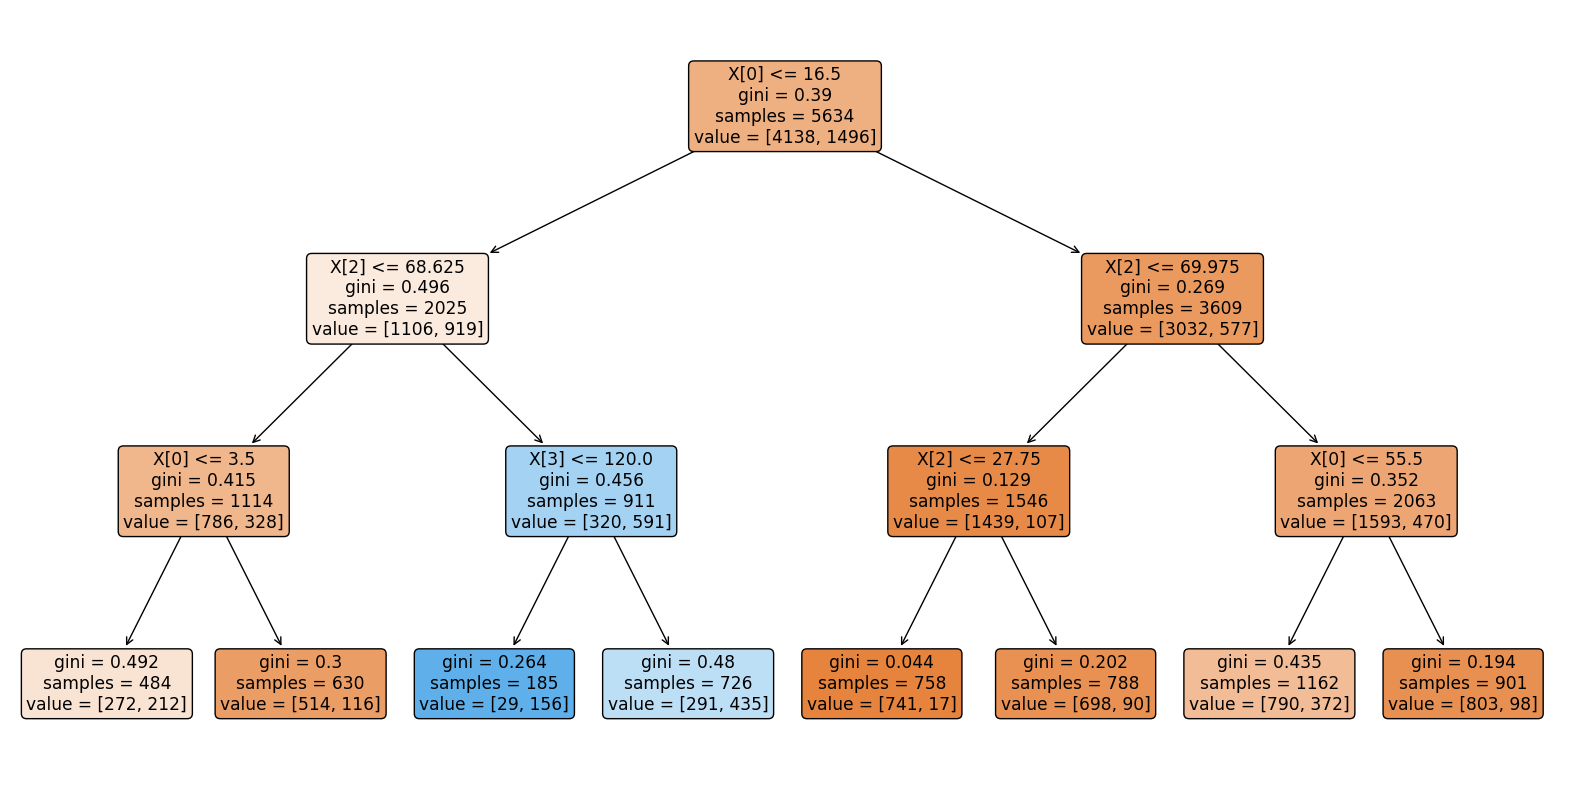

In [26]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (20,10))

plot_tree(model_tree,filled = True, rounded=True)
plt.show()

In [27]:
performance_df = pd.DataFrame({'Error_metric': ['Accuracy','Precision','Recall'],
                               'Train': [accuracy_score(y_train, y_pred_train_dt),
                                         precision_score(y_train, y_pred_train_dt),
                                         recall_score(y_train, y_pred_train_dt)],
                               'Test': [accuracy_score(y_test, y_pred_test_dt),
                                        precision_score(y_test, y_pred_test_dt),
                                        recall_score(y_test, y_pred_test_dt)]})

display(performance_df)

,Error_metric,Train,Test
0,Accuracy,0.782570,0.792051
1,Precision,0.648738,0.663934
2,Recall,0.395053,0.434316


- The Knn prediction is more accurate than the Decision Tree's.
- Moreover, proportion of positive instances that are correctly identified by the model (recall) is really low for the tree.

# Round 3

apply K-fold cross validation on your models built before,  and check the model score. Note: So far we have not balanced the data.

In [13]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [30]:
#KNN MODEL
scores=cross_val_score(model, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.75865129 0.74622893 0.73913043 0.73558119 0.73801066]
Score stats: 0.74 accuracy with a standard deviation of 0.01


In [31]:
#DECISION TREE
scores=cross_val_score(model_tree, X_train, y_train, cv=5)
print("Cross validation scores: ", scores)
print("Score stats: %0.2f accuracy with a standard deviation of %0.2f" % (scores.mean(), scores.std()))

Cross validation scores:  [0.78615794 0.78793256 0.76397516 0.78083407 0.77886323]
Score stats: 0.78 accuracy with a standard deviation of 0.01


# Round 4

fit a Random forest Classifier on the data and compare the accuracy.
tune the hyper parameters with Gridsearch and check the results. retrain the final mode with the best parameters found.

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc_ops = {"max_depth":3,  #sets the max_depth for all trees, if we don't pass it it will be random
           "min_samples_leaf":20,
           "max_features":None,
           "n_estimators":100,   #number of models (trees here)
           "bootstrap":True,   #use bootstrapping
           "oob_score":True,   #use out of bag score (need to use bootstrapping)
           "random_state":42}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_train)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_train)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

train prediction accuracy score: 0.79
test prediction accuracy score: 0.79


In [39]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100,500],
    'min_samples_leaf' : [1, 2],
    'max_features': ['None','sqrt'],
    'max_depth':[3,5,10],
    'bootstrap':[True,False],
    'oob_score':[True,False]
    }
clf = RandomForestClassifier(random_state=42)

In [40]:
grid_search = GridSearchCV(clf, param_grid, cv=5,return_train_score=True,n_jobs=-1)

In [41]:
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False], 'max_depth': [3, 5, 10],
                         'max_features': ['None', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'n_estimators': [50, 100, 500],
                         'oob_score': [True, False]},
             return_train_score=True)

In [42]:
best_params = grid_search.best_params_ #To check the best set of parameters returned
best_params

{'bootstrap': True,
 'max_depth': 5,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'n_estimators': 100,
 'oob_score': True}

In [43]:
rfc_ops = {"max_depth":5,  #sets the max_depth for all trees, if we don't pass it it will be random
           "min_samples_leaf":2,
           "max_features":'sqrt',
           "n_estimators":100,   #number of models (trees here)
           "bootstrap":True,   #use bootstrapping
           "oob_score":True,   #use out of bag score (need to use bootstrapping)
           "random_state":42}

clf = RandomForestClassifier(**rfc_ops)

        #max_depth=6,min_samples_leaf=20,max_features=None,n_estimators=100,
         #                    bootstrap=True,oob_score=True, random_state=RAND_STATE)
clf.fit(X_train, y_train)
print("train prediction accuracy score: %.2f" %(clf.score(X_train, y_train)))
print("test prediction accuracy score: %.2f"  %(clf.score(X_test, y_test)))

train prediction accuracy score: 0.80
test prediction accuracy score: 0.80


# Managing imbalance in the dataset

In [4]:
churnData['Churn'].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

In [ ]:
#Downsampling

In [20]:
from imblearn.under_sampling import TomekLinks
tl = TomekLinks(sampling_strategy='majority')
X_tl, y_tl = tl.fit_resample(X,y) # returns resampled data
y_tl.value_counts() # check the distribution of resampled labels

No     4622
Yes    1869
Name: Churn, dtype: int64

In [21]:
print(X_tl.shape)
y_tl.shape

(6491, 4)


(6491,)

In [13]:
scaler = StandardScaler()
scaler.fit(X_train_down)
X_train_mod = scaler.transform(X_train_down)
X_test_mod  = scaler.transform(X_test)

In [14]:
print(X_train_mod.shape)
y_train_down.shape

(2992, 4)


(2992,)

In [ ]:
#Upsampling

In [15]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [16]:
X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts()

0    4138
1    4138
Name: Churn, dtype: int64

In [17]:
scaler = StandardScaler()
scaler.fit(X_sm)
X_train_mod = scaler.transform(X_sm)
X_test_mod  = scaler.transform(X_test)